<a href="https://colab.research.google.com/github/hanutm/DigitRecognizer/blob/master/DigitRec_kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
drive.mount('/content/drive')
from scipy.spatial import distance

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
####################################
### Generate Centres for classes ###
####################################

def generate_centres(X):
  centres = list()
  classes = sorted(list(X.label.unique()))
  for i in classes:
    df_class = X.loc[X.label == i]
    df_class = df_class.iloc[:,df.columns != "label"]
    centres.append(df_class.mean(axis=0))
  return(centres)

In [0]:
###############################################
### Generate Normalized Centres for classes ###
###############################################

def generate_normalized_centres(X):
  centres = list()
  classes = sorted(list(X.label.unique()))
  for i in classes:
    df_class = X.loc[X.label == i]
    df_class = df_class.iloc[:,1:]
    centroid = df_class.mean(axis=0)*df_class.std(axis=0)
    centres.append(list(np.nan_to_num(centroid)))
  return(centres)

In [0]:
#########################################
### Convert and view data as an image ###
#########################################
def check_digit(img):                    
  img = 255 - np.reshape(img,(28,28))   #### Reshape into a square grid, and invert image
  plt.imshow(img)
  plt.show()

In [0]:
##############################################
### Prediction based on Euclidean Distance ###
##############################################

def pred_euclidean(X,centre):
  labels = pd.Series(np.zeros(len(X)))
  for j in range(0,len(X)):
    dist = list()
    for i in range(0,10):
      distance = np.dot(centre[i],X.iloc[j])
      dist.append(distance)
    labels[j] = np.argmax(dist)
  return labels

In [0]:
#############################################
### Prediction based on Cosine Similarity ###
#############################################

def pred_cosine(X,centre):
  labels = pd.Series(np.zeros(len(X)))
  for j in range(0,len(X)):
    dist = list()
    for i in range(0,10):
      dot = np.dot(centre[i],X.iloc[j])
      a = np.linalg.norm(centre[i])
      b = np.linalg.norm(X.iloc[j])
      ang = math.acos(dot/(a*b))
      dist.append(ang)
    labels[j] = np.argmin(dist)
  return labels

In [0]:
# print(pred_cosine(df_test.iloc[0:5]))

In [0]:
################################################
### Prediction based on Mahalanobis Distance ###
################################################

## Does not work because of singular cov-matrices

for i in range(0,10):                ## mahalanobis distance
  print(i)
  dfI = df[df.label == i]
  dfI = dfI.iloc[:,df.columns != "label"]
  cov = dfI.cov()
#   iv = np.linalg.inv(cov)
#   distance.mahalanobis(kNN[i],df_test.iloc[120],iv)
#   print(i)
#   print(distance)
  

In [0]:
df = pd.read_csv("/content/drive/My Drive/Datasets/Digit Recognisation/train.csv")
df_test = pd.read_csv("/content/drive/My Drive/Datasets/Digit Recognisation/test.csv")

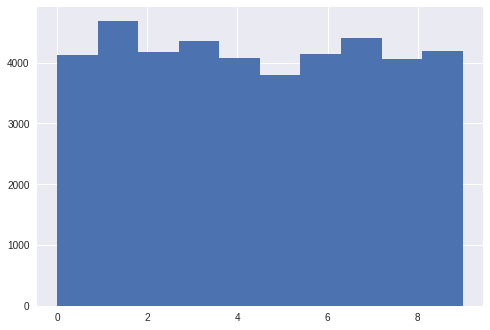

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


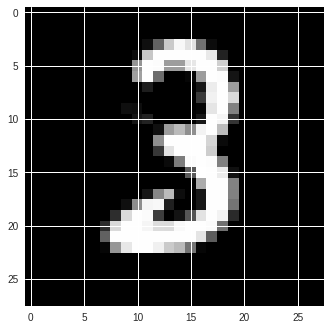

In [46]:
#### To check distribution in training dataset ###

plt.hist(df.label,10)
plt.show()

####

check_digit(df_test.iloc[4]) ### Visualizing individual row to understand setup of data

In [0]:
### Train-test-split method ###
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:],df.iloc[:,0],test_size = .33, random_state = 53)

X_train = X_train.assign(label = y_train)
Centroids = generate_centres(X_train)
nCentroids = generate_normalized_centres(X_train)

In [0]:
Euc = pred_euclidean(X_test,Centroids)
nEuc = pred_euclidean(X_test,nCentroids)
Cos = pred_cosine(X_test,Centroids)
nCos = pred_cosine(X_test,nCentroids)

In [45]:
print(accuracy_score(y_test,Euc))
print(accuracy_score(y_test,nEuc))
print(accuracy_score(y_test,Cos))
print(accuracy_score(y_test,nCos))

0.5367243867243867
0.5057720057720058
0.7830447330447331
0.7717171717171717
